In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import metrics
import warnings
warnings.filterwarnings("ignore")

In [16]:
pd,np,plt,sns

(<module 'pandas' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>,
 <module 'numpy' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>,
 <module 'matplotlib.pyplot' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <module 'seaborn' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>)

In [17]:
dataset = pd.read_excel('data/Telco_customer_churn.xlsx')

In [18]:
dataset

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [19]:
def data_info(dataset):
    cols = []
    unique = []
    n_uniques = []
    dtypes = []
    nulls = []

    for col in dataset.columns:
        cols.append(col)
        dtypes.append(dataset[col].dtype)
        n_uniques.append(dataset[col].nunique())
        unique.append(dataset[col].unique())
        nulls.append(dataset[col].isna().sum())

    return pd.DataFrame({'Columns' : cols , 'n_uniques' : n_uniques ,
                         'unique' :unique , 'dtypes' : dtypes , "NULLS" : nulls
                        })

In [20]:
data_info(dataset)

,Columns,n_uniques,unique,dtypes,NULLS
0,CustomerID,7043,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",object,0
1,Count,1,[1],int64,0
2,Country,1,[United States],object,0
3,State,1,[California],object,0
4,City,1129,"[Los Angeles, Beverly Hills, Huntington Park, ...",object,0
5,Zip Code,1652,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",int64,0
6,Lat Long,1652,"[33.964131, -118.272783, 34.059281, -118.30742...",object,0
7,Latitude,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",float64,0
8,Longitude,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",float64,0
9,Gender,2,"[Male, Female]",object,0


In [21]:
dataset.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [22]:
metrics.data_info(dataset)

,Columns,n_uniques,unique,dtypes,NULLS
0,CustomerID,7043,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",object,0
1,Count,1,[1],int64,0
2,Country,1,[United States],object,0
3,State,1,[California],object,0
4,City,1129,"[Los Angeles, Beverly Hills, Huntington Park, ...",object,0
5,Zip Code,1652,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",int64,0
6,Lat Long,1652,"[33.964131, -118.272783, 34.059281, -118.30742...",object,0
7,Latitude,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",float64,0
8,Longitude,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",float64,0
9,Gender,2,"[Male, Female]",object,0


In [23]:
dataset.drop(['Count','Country','CustomerID','State', 'Zip Code','Lat Long','Churn Label'],axis=1,inplace=True)

In [24]:
metrics.data_info(dataset)

,Columns,n_uniques,unique,dtypes,NULLS
0,City,1129,"[Los Angeles, Beverly Hills, Huntington Park, ...",object,0
1,Latitude,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",float64,0
2,Longitude,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",float64,0
3,Gender,2,"[Male, Female]",object,0
4,Senior Citizen,2,"[No, Yes]",object,0
5,Partner,2,"[No, Yes]",object,0
6,Dependents,2,"[No, Yes]",object,0
7,Tenure Months,73,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",int64,0
8,Phone Service,2,"[Yes, No]",object,0
9,Multiple Lines,3,"[No, Yes, No phone service]",object,0


In [25]:
for i in dataset['Total Charges']:
    print(i)

108.15
151.65
820.5
3046.05
5036.3
528.35
39.65
20.15
4749.15
30.2
1093.1
316.9
3549.25
1105.4
144.15
1426.4
633.3
1752.55
857.25
79.35
496.9
927.35
113.85
2514.5
7611.85
5238.9
2868.15
1064.65
229.55
2135.5
1502.65
35.45
81.25
70.45
563.65
45.65
655.5
1592.35
273
2651.2
242.8
5000.2
1145.7
503.6
29.95
662.65
1111.65
24.8
531
79.9
1934.45
84.5
268.35
179.35
55.2
84.6
114.1
1120.3
1074.3
48.55
147.15
40.2
80.55
132.2
1364.3
1099.6
1511.2
24.8
70.6
401.1
5624.85
1779.95
70
606.55
435.4
1712.7
73.6
396.1
2303.35
415.55
3058.65
2231.05
4350.1
139.05
511.25
155.8
5293.95
4759.85
6603
168.2
371.9
840.1
846
805.1
492.55
181.5
2566.5
50.65
90.85
214.75
4874.7
2524.45
7007.6
19.9
19.6
233.7
1845.9
75.3
1182.55
518.9
6396.45
69.55
2227.1
385.9
673.25
734.35
55
74.7
1861.5
453.4
994.8
2145
680.05
74.35
139.4
903.6
131.05
1238.45
1782.4
167.5
502.85
334.8
4131.95
1929.35
1758.6
3480
85
834.1
597
3266
2596.15
3527.6
5614.45
233.55
75.3
346.2
85.7
713.75
6786.4
248.95
663.05
137.6
4547.25
4687.9
698

In [26]:
dataset['Total Charges'] = pd.to_numeric(dataset['Total Charges'],errors='coerce')

In [27]:
dataset['Total Charges'].fillna(dataset['Total Charges'].median(),inplace=True)

In [28]:
dataset['Total Charges']

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64

In [31]:
dataset.drop(['Churn Reason'],inplace=True,axis=1)

In [32]:
dataset.drop(['City'],inplace=True,axis=1)

In [33]:
data_info(dataset)

,Columns,n_uniques,unique,dtypes,NULLS
0,Latitude,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",float64,0
1,Longitude,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",float64,0
2,Gender,2,"[Male, Female]",object,0
3,Senior Citizen,2,"[No, Yes]",object,0
4,Partner,2,"[No, Yes]",object,0
5,Dependents,2,"[No, Yes]",object,0
6,Tenure Months,73,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",int64,0
7,Phone Service,2,"[Yes, No]",object,0
8,Multiple Lines,3,"[No, Yes, No phone service]",object,0
9,Internet Service,3,"[DSL, Fiber optic, No]",object,0


In [35]:
cont = {'Month-to-month':0,'Two year':2, 'One year':1}

In [36]:
dataset.Contract.replace(cont,inplace=True)

In [37]:
data_info(dataset)

,Columns,n_uniques,unique,dtypes,NULLS
0,Latitude,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",float64,0
1,Longitude,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",float64,0
2,Gender,2,"[Male, Female]",object,0
3,Senior Citizen,2,"[No, Yes]",object,0
4,Partner,2,"[No, Yes]",object,0
5,Dependents,2,"[No, Yes]",object,0
6,Tenure Months,73,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",int64,0
7,Phone Service,2,"[Yes, No]",object,0
8,Multiple Lines,3,"[No, Yes, No phone service]",object,0
9,Internet Service,3,"[DSL, Fiber optic, No]",object,0


In [38]:
dataset = pd.get_dummies(dataset,drop_first=True)

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Latitude                                7043 non-null   float64
 1   Longitude                               7043 non-null   float64
 2   Tenure Months                           7043 non-null   int64  
 3   Contract                                7043 non-null   int64  
 4   Monthly Charges                         7043 non-null   float64
 5   Total Charges                           7043 non-null   float64
 6   Churn Value                             7043 non-null   int64  
 7   Churn Score                             7043 non-null   int64  
 8   CLTV                                    7043 non-null   int64  
 9   Gender_Male                             7043 non-null   uint8  
 10  Senior Citizen_Yes                      7043 non-null   uint

In [40]:
data_info(dataset)

,Columns,n_uniques,unique,dtypes,NULLS
0,Latitude,1652,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",float64,0
1,Longitude,1651,"[-118.272783, -118.30742, -118.293953, -118.31...",float64,0
2,Tenure Months,73,"[2, 8, 28, 49, 10, 1, 47, 17, 5, 34, 11, 15, 1...",int64,0
3,Contract,3,"[0, 2, 1]",int64,0
4,Monthly Charges,1585,"[53.85, 70.7, 99.65, 104.8, 103.7, 55.2, 39.65...",float64,0
5,Total Charges,6531,"[108.15, 151.65, 820.5, 3046.05, 5036.3, 528.3...",float64,0
6,Churn Value,2,"[1, 0]",int64,0
7,Churn Score,85,"[86, 67, 84, 89, 78, 100, 92, 77, 97, 74, 66, ...",int64,0
8,CLTV,3438,"[3239, 2701, 5372, 5003, 5340, 5925, 5433, 483...",int64,0
9,Gender_Male,2,"[1, 0]",uint8,0


In [41]:
X = dataset.drop(['Churn Value'],axis=1).values
y = dataset['Churn Value'].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression
ml_model = LogisticRegression()
ml_model.fit(X_train, y_train)

LogisticRegression()

In [64]:
ml_model.score(X_test, y_test)

0.9280983916745507

In [65]:
ml_model.score(X_train, y_train)

0.9213164049448713

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [122]:
model = Sequential()
model.add(Dense(units=50,input_dim=X_train.shape[1],activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(units=50,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=50,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 50)                1700      
                                                                 
 batch_normalization_22 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_34 (Dense)            (None, 50)                2550      
                                                                 
 batch_normalization_23 (Bat  (None, 50)               200       
 chNormalization)                                                
                                                                 
 dense_35 (Dense)            (None, 50)               

In [113]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
e = EarlyStopping(monitor='val_loss',patience=3)

In [114]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

Epoch 1/30
43/43 [==============================] - 1s 7ms/step - loss: 0.6503 - accuracy: 0.6467 - val_loss: 0.5920 - val_accuracy: 0.7462
Epoch 2/30
43/43 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7685 - val_loss: 0.5324 - val_accuracy: 0.7679
Epoch 3/30
43/43 [==============================] - 0s 3ms/step - loss: 0.4290 - accuracy: 0.8099 - val_loss: 0.4778 - val_accuracy: 0.7896
Epoch 4/30
43/43 [==============================] - 0s 3ms/step - loss: 0.3805 - accuracy: 0.8444 - val_loss: 0.4375 - val_accuracy: 0.7980
Epoch 5/30
43/43 [==============================] - 0s 3ms/step - loss: 0.3611 - accuracy: 0.8480 - val_loss: 0.4044 - val_accuracy: 0.8280
Epoch 6/30
43/43 [==============================] - 0s 3ms/step - loss: 0.3332 - accuracy: 0.8682 - val_loss: 0.3809 - val_accuracy: 0.8347
Epoch 7/30
43/43 [==============================] - 0s 3ms/step - loss: 0.3164 - accuracy: 0.8715 - val_loss: 0.3665 - val_accuracy: 0.8381
Epoch 8/30
43/43 [==

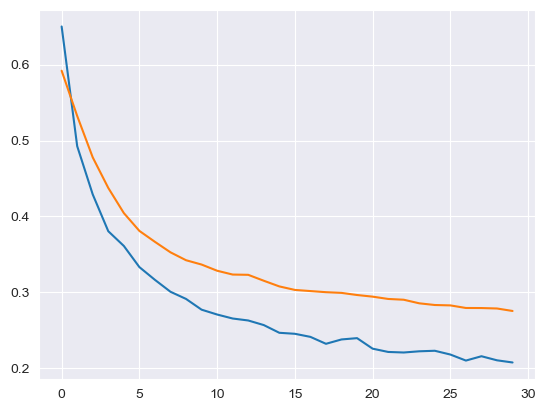

In [115]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val_test')
plt.show()

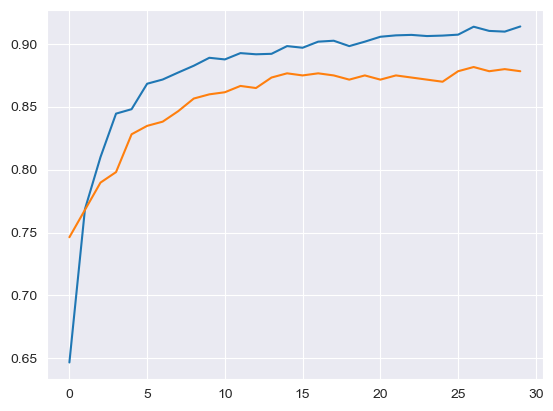

In [116]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val_test')
plt.show()

In [117]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 0s 1ms/step - loss: 0.2122 - accuracy: 0.9149


[0.21215547621250153, 0.9148533344268799]

In [118]:
y_pred = model.predict(X_test)

34/34 [==============================] - 0s 845us/step


In [119]:
y_pred = [1 if pred>0.5 else 0 for pred in y_pred]

In [120]:
y_pred

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [121]:
metrics.Classification.test(y_test,y_pred)

Accuracy: 0.9148533585619678
F1 Score: 0.8421052631578948
Recall: 0.821917808219178
Precision: 0.8633093525179856
Confusion Matrix:
 [[727  38]
 [ 52 240]]
Specificity: 0.9503267973856209
